# Predicting the Geographical Origin of Music

Reading the data

In [1]:
import csv
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib

with open('C:/Users/kava2/Desktop/default_features_1059_tracks.txt', newline='') as inputfile:
    data = list(csv.reader(inputfile))


In [2]:
data = np.asarray(data)
data.shape

(1059, 70)

In [3]:
X = data[:, 0:68]
y = data[:, 68:70]

print("X sample")
print(X[0, 1])
print("")
print("y sample")
print(y[0, 0:2])



X sample
7.835325

y sample
['-15.75' '-47.95']


In [4]:
y = y.astype(dtype = np.float)
print(y[0, 0:2])

[-15.75 -47.95]


## Performing KMeans based on the latitude and longitude

In [5]:
n_clusters = 33
kmeans = KMeans(n_clusters=n_clusters, max_iter = 500, algorithm='full')
kmeans = kmeans.fit(y)
labels = kmeans.predict(y)

#print('Centroids')
centroids = kmeans.cluster_centers_
#print(centroids)

<Figure size 432x288 with 0 Axes>

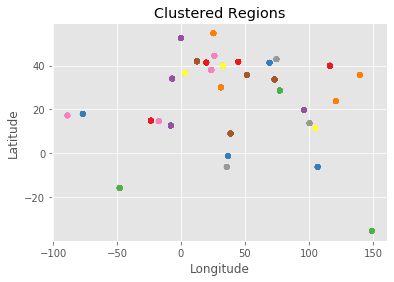

<Figure size 432x288 with 0 Axes>

In [6]:
plt.style.use('ggplot')
cmap = matplotlib.cm.get_cmap("Set1")
label_color = [cmap(float(l) /n_clusters) for l in labels]
plt.scatter(y[:, 1], y[:, 0], c = label_color, s=25)
plt.title("Clustered Regions")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.figure()

## PCA: Dimensionality Reduction

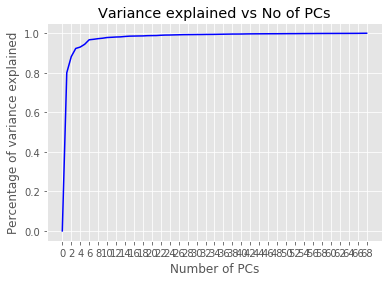

In [7]:
y = labels
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.8, random_state=1234)

X_scaler = StandardScaler().fit(X)
scaled_Xtrain = X_scaler.transform(Xtrain)
scaled_Xtest = X_scaler.transform(Xtest)

PCA_var = PCA(n_components = X_scaler.transform(X).shape[1])
PCA_var.fit(X_scaler.transform(X))
PCA_var_exp = [1 - x/sum(PCA_var.explained_variance_) for x in PCA_var.explained_variance_]

PCA_var_exp.insert(0, 0)

plt.figure()
plt.title("Variance explained vs No of PCs")
plt.xlabel("Number of PCs")
plt.ylabel("Percentage of variance explained")
plt.plot(range(0, len(PCA_var_exp)), PCA_var_exp, c = 'b')
plt.xticks(range(0, len(PCA_var_exp),2))
plt.show()

In [8]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
import pandas as pd

In [9]:
df = pd.read_csv('C:/Users/kava2/Desktop/default_features_1059_tracks.txt', delimiter=",", header=None)
X =  df.iloc[: , :-2]
scaler = StandardScaler().fit(X)
scaled_x = scaler.transform(X)
PCA_model = PCA()
PCA_model.fit(scaled_x)
PCA_model.explained_variance_

array([1.36077800e+01, 8.06754586e+00, 5.24429095e+00, 4.76379249e+00,
       3.80692885e+00, 2.25729380e+00, 2.08743968e+00, 1.87124193e+00,
       1.71542344e+00, 1.47998707e+00, 1.39744044e+00, 1.30391545e+00,
       1.25639373e+00, 1.11418190e+00, 1.00637734e+00, 9.74530152e-01,
       9.43811507e-01, 9.24755813e-01, 8.44880127e-01, 8.11008679e-01,
       7.95693284e-01, 6.97264438e-01, 6.35197549e-01, 6.17673459e-01,
       5.72783377e-01, 5.37443007e-01, 4.95478861e-01, 4.83081255e-01,
       4.68140561e-01, 4.51469848e-01, 4.41163005e-01, 4.19257570e-01,
       4.03422960e-01, 3.94863860e-01, 3.58708876e-01, 3.35795677e-01,
       3.10574342e-01, 2.85489037e-01, 2.81856614e-01, 2.70607700e-01,
       2.41042978e-01, 2.19330328e-01, 2.06895527e-01, 2.01248740e-01,
       1.92182308e-01, 1.84603849e-01, 1.76550525e-01, 1.73357458e-01,
       1.61881025e-01, 1.49516595e-01, 1.40901317e-01, 1.38934176e-01,
       1.24549042e-01, 1.12743666e-01, 1.06099826e-01, 1.01420060e-01,
      

## 6 Principal Components explain Maximum Variance

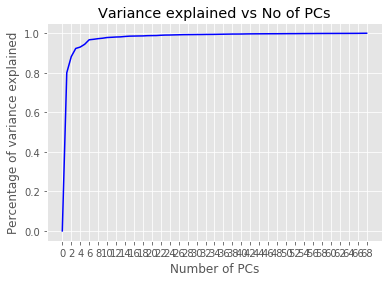

In [10]:
PCA_var = PCA(n_components = scaler.transform(X).shape[1])
PCA_var.fit(scaler.transform(X))
PCA_var_exp = [1 - x/sum(PCA_var.explained_variance_) for x in PCA_var.explained_variance_]

PCA_var_exp.insert(0, 0)

plt.figure()
plt.title("Variance explained vs No of PCs")
plt.xlabel("Number of PCs")
plt.ylabel("Percentage of variance explained")
plt.plot(range(0, len(PCA_var_exp)), PCA_var_exp, c = 'b')
plt.xticks(range(0, len(PCA_var_exp),2))
plt.show()

## Performing PCA and getting the Principal Components

In [11]:
pca = PCA(n_components = 6)
pca.fit(scaled_x)
sources_pca = pca.transform(scaled_x)
sources_pca

array([[-1.06872541,  8.43727665,  5.19723107,  8.03162083,  5.96169235,
         1.25000667],
       [ 0.19052799,  0.86266255,  0.07284959,  2.82587204, -0.64876732,
        -0.9426131 ],
       [ 4.14991825, -1.39798884, -2.09978594,  0.74589067, -2.96263756,
         0.92551937],
       ...,
       [-3.00006574, -1.80171563, -0.67360113, -0.14160033, -0.41357503,
        -0.88046171],
       [ 1.14937162,  0.43682983,  1.98790063, -4.57903299,  1.23590699,
         2.58881117],
       [17.07445979, -3.12186235, -3.30924098, -1.05287346,  0.99297235,
         3.22326795]])

## Determining the optimal number of clusters for K-Means

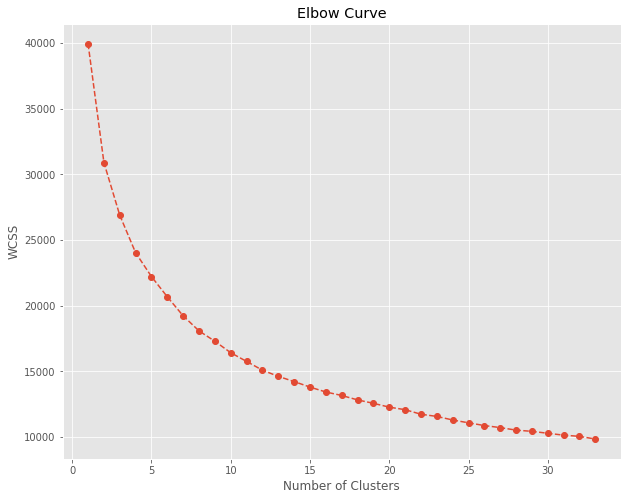

In [12]:
wcss = []
for i in range(1, 34):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 55)
    kmeans_pca.fit(sources_pca)
    wcss.append(kmeans_pca.inertia_)
    
plt.figure(figsize = (10,8))
plt.plot(range(1,34), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Curve')
plt.show()

In [13]:
kmeans_pca = KMeans(n_clusters = 4, init = 'k-means++', random_state = 55)
kmeans_pca.fit(sources_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=55, tol=0.0001, verbose=0)

## Mapping the latitude and longitude to Country names

In [14]:
#df1 = pd.read_csv('Geographical_Original_of_Music_2/default_features_1059_tracks.txt', delimiter=",", header=None)
#lat_lon = df1.groupby([68,69]).size().reset_index().rename(columns={0:'count'})
#lat_lon.to_csv('lat_long.csv') 

df_lat_lon = pd.read_csv('C:/Users/kava2/Downloads/lat_long.csv')
df.head()
df_countries = pd.merge(df, df_lat_lon,  how='left', left_on=[68,69], right_on = ['lat','long'])
df_countries.head()

,0,1,2,3,4,5,6,7,8,9,...,63,64,65,66,67,68,69,lat,long,country
0,7.161286,7.835325,2.911583,0.984049,-1.499546,-2.094097,0.576000,-1.205671,1.849122,-0.425598,...,-0.174878,-1.089543,-0.668840,-0.914772,-0.836250,-15.75,-47.95,-15.75,-47.95,Brazil
1,0.225763,-0.094169,-0.603646,0.497745,0.874036,0.290280,-0.077659,-0.887385,0.432062,-0.093963,...,-0.157189,0.380951,1.088478,-0.123595,1.391141,14.91,-23.51,14.91,-23.51,Cape Verde
2,-0.692525,-0.517801,-0.788035,1.214351,-0.907214,0.880213,0.406899,-0.694895,-0.901869,-1.701574,...,2.718442,0.972919,2.081069,1.375763,1.063847,12.65,-8.00,12.65,-8.00,Mali
3,-0.735562,-0.684055,2.058215,0.716328,-0.011393,0.805396,1.497982,0.114752,0.692847,0.052377,...,-1.020687,-0.751380,-0.385005,-0.012326,-0.392197,9.03,38.74,9.03,38.74,Ethiopia
4,0.570272,0.273157,-0.279214,0.083456,1.049331,-0.869295,-0.265858,-0.401676,-0.872639,1.147483,...,-0.190488,0.306974,0.119658,0.271838,1.289783,34.03,-6.85,34.03,-6.85,Morocco


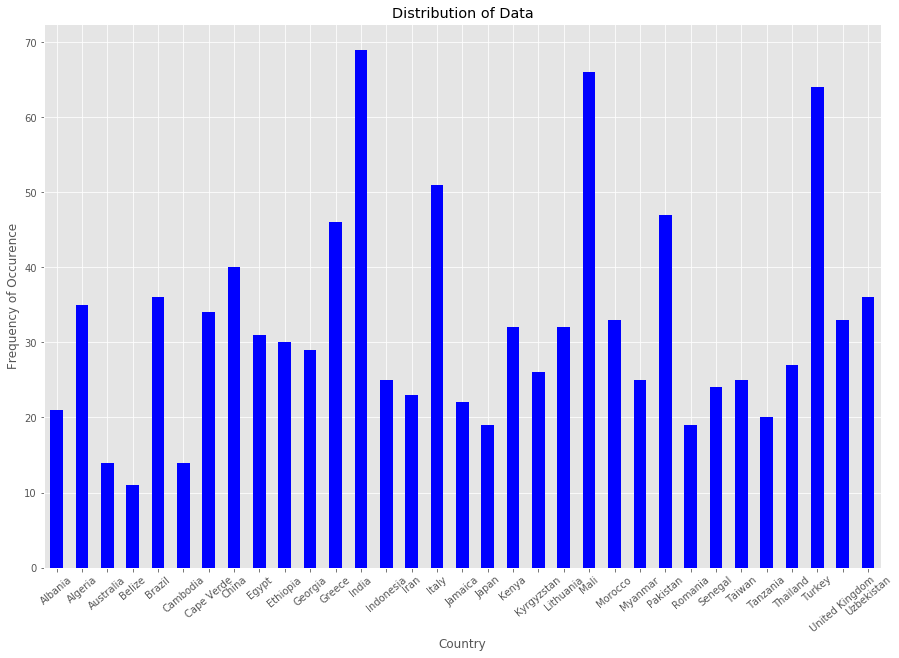

In [15]:
X = df_countries.iloc[:, :-1]
y = df_countries['country']

plt.figure(figsize=(15,10))

y.value_counts().sort_index().plot.bar(x='Target Value', y='Number of Occurrences', color = 'blue')
plt.xticks(rotation = 40)
plt.xlabel("Country")
plt.ylabel("Frequency of Occurence")
plt.title("Distribution of Data")
plt.show()


In [16]:
df_pca_kmeans = pd.concat([df.reset_index(drop=True), \
                pd.DataFrame(sources_pca, \
                columns=['Component 1', 'Component 2', 'Component 3', 'Component 4', 'Component 5', 'Component 6'] )],\
                axis = 1)

df_pca_kmeans.head()

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6
0,7.161286,7.835325,2.911583,0.984049,-1.499546,-2.094097,0.576000,-1.205671,1.849122,-0.425598,...,-0.914772,-0.836250,-15.75,-47.95,-1.068725,8.437277,5.197231,8.031621,5.961692,1.250007
1,0.225763,-0.094169,-0.603646,0.497745,0.874036,0.290280,-0.077659,-0.887385,0.432062,-0.093963,...,-0.123595,1.391141,14.91,-23.51,0.190528,0.862663,0.072850,2.825872,-0.648767,-0.942613
2,-0.692525,-0.517801,-0.788035,1.214351,-0.907214,0.880213,0.406899,-0.694895,-0.901869,-1.701574,...,1.375763,1.063847,12.65,-8.00,4.149918,-1.397989,-2.099786,0.745891,-2.962638,0.925519
3,-0.735562,-0.684055,2.058215,0.716328,-0.011393,0.805396,1.497982,0.114752,0.692847,0.052377,...,-0.012326,-0.392197,9.03,38.74,-0.947960,4.093904,2.281610,-0.324633,-1.668093,1.756031
4,0.570272,0.273157,-0.279214,0.083456,1.049331,-0.869295,-0.265858,-0.401676,-0.872639,1.147483,...,0.271838,1.289783,34.03,-6.85,0.366876,-1.564429,0.080292,2.907152,0.253181,-0.759579


In [17]:
df_pca_kmeans['Segment K Means'] = kmeans_pca.labels_
df_pca_kmeans.head()

,0,1,2,3,4,5,6,7,8,9,...,67,68,69,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Segment K Means
0,7.161286,7.835325,2.911583,0.984049,-1.499546,-2.094097,0.576000,-1.205671,1.849122,-0.425598,...,-0.836250,-15.75,-47.95,-1.068725,8.437277,5.197231,8.031621,5.961692,1.250007,1
1,0.225763,-0.094169,-0.603646,0.497745,0.874036,0.290280,-0.077659,-0.887385,0.432062,-0.093963,...,1.391141,14.91,-23.51,0.190528,0.862663,0.072850,2.825872,-0.648767,-0.942613,1
2,-0.692525,-0.517801,-0.788035,1.214351,-0.907214,0.880213,0.406899,-0.694895,-0.901869,-1.701574,...,1.063847,12.65,-8.00,4.149918,-1.397989,-2.099786,0.745891,-2.962638,0.925519,2
3,-0.735562,-0.684055,2.058215,0.716328,-0.011393,0.805396,1.497982,0.114752,0.692847,0.052377,...,-0.392197,9.03,38.74,-0.947960,4.093904,2.281610,-0.324633,-1.668093,1.756031,1
4,0.570272,0.273157,-0.279214,0.083456,1.049331,-0.869295,-0.265858,-0.401676,-0.872639,1.147483,...,1.289783,34.03,-6.85,0.366876,-1.564429,0.080292,2.907152,0.253181,-0.759579,3


In [18]:
df_pca_kmeans['Cluster'] = df_pca_kmeans['Segment K Means'].map({0: 'first', 1: 'second', 2: 'third', 3: 'fourth'})

In [19]:
df_pca_kmeans_country = pd.concat([df_pca_kmeans, df_countries['country']], axis = 1)
df_pca_kmeans_country.head()

,0,1,2,3,4,5,6,7,8,9,...,69,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Segment K Means,Cluster,country
0,7.161286,7.835325,2.911583,0.984049,-1.499546,-2.094097,0.576000,-1.205671,1.849122,-0.425598,...,-47.95,-1.068725,8.437277,5.197231,8.031621,5.961692,1.250007,1,second,Brazil
1,0.225763,-0.094169,-0.603646,0.497745,0.874036,0.290280,-0.077659,-0.887385,0.432062,-0.093963,...,-23.51,0.190528,0.862663,0.072850,2.825872,-0.648767,-0.942613,1,second,Cape Verde
2,-0.692525,-0.517801,-0.788035,1.214351,-0.907214,0.880213,0.406899,-0.694895,-0.901869,-1.701574,...,-8.00,4.149918,-1.397989,-2.099786,0.745891,-2.962638,0.925519,2,third,Mali
3,-0.735562,-0.684055,2.058215,0.716328,-0.011393,0.805396,1.497982,0.114752,0.692847,0.052377,...,38.74,-0.947960,4.093904,2.281610,-0.324633,-1.668093,1.756031,1,second,Ethiopia
4,0.570272,0.273157,-0.279214,0.083456,1.049331,-0.869295,-0.265858,-0.401676,-0.872639,1.147483,...,-6.85,0.366876,-1.564429,0.080292,2.907152,0.253181,-0.759579,3,fourth,Morocco


## K-Means with clusters=4

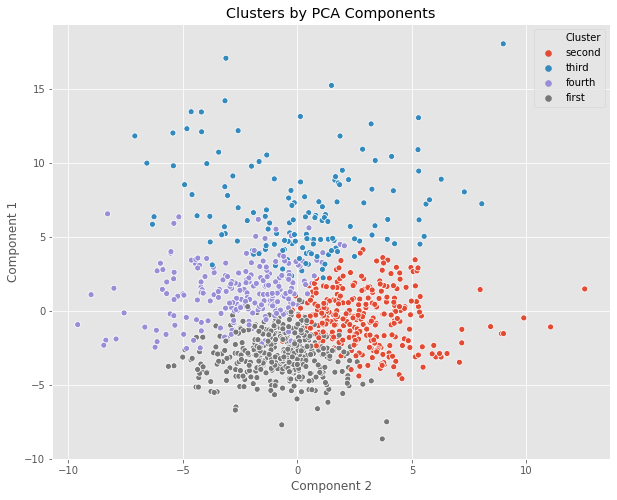

In [20]:
import seaborn as sns
x_axis = df_pca_kmeans_country['Component 2']
y_axis = df_pca_kmeans_country['Component 1']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue=df_pca_kmeans_country['Cluster'])
plt.title('Clusters by PCA Components')
plt.show()

### Percentage of songs from each country that belong to a cluster (clusters = 4)

In [21]:
def get_clusters(df_pca_kmeans_country):
    clusters = {}
    countries = {}
    for index, row in df_pca_kmeans_country.iterrows():
        if row['Cluster'] not in clusters:
            clusters[row['Cluster']] = {}
        if row['country'] in clusters[row['Cluster']]:
            clusters[row['Cluster']][row['country']] += 1
        else:
            clusters[row['Cluster']][row['country']] = 1
        #getting total country counts
        if row['country'] in countries:
            countries[row['country']] += 1
        else:
            countries[row['country']] = 1

    for key in clusters:
        print("-----------")
        print(key)
        print("-----------")
        for k in clusters[key]:
            print(k, " ", round(((clusters[key][k])/countries[k]),2))
get_clusters(df_pca_kmeans_country)

-----------
second
-----------
Brazil   0.5
Cape Verde   0.41
Ethiopia   0.2
Mali   0.7
Senegal   0.58
Uzbekistan   0.28
India   0.28
Romania   0.26
Algeria   0.57
Turkey   0.19
China   0.25
Jamaica   0.91
Egypt   0.39
Italy   0.12
Australia   0.57
Japan   0.37
Belize   0.27
Tanzania   0.5
Morocco   0.12
Cambodia   0.14
Myanmar   0.08
Indonesia   0.32
Kenya   0.38
Iran   0.13
Albania   0.14
Thailand   0.19
Pakistan   0.17
United Kingdom   0.15
Kyrgyzstan   0.04
-----------
third
-----------
Mali   0.17
Lithuania   0.28
Romania   0.37
Myanmar   0.92
Thailand   0.37
Indonesia   0.32
Kenya   0.22
Iran   0.13
Australia   0.07
Japan   0.11
Georgia   0.07
Cambodia   0.71
Uzbekistan   0.06
China   0.3
Pakistan   0.02
Turkey   0.06
Greece   0.15
Cape Verde   0.06
Ethiopia   0.07
India   0.07
Senegal   0.12
Italy   0.02
Morocco   0.06
Egypt   0.06
Albania   0.14
Brazil   0.03
Tanzania   0.15
Kyrgyzstan   0.04
-----------
fourth
-----------
Morocco   0.21
United Kingdom   0.79
Romania   0.11
Tha

## K-Means with clusters = 3

In [22]:
kmeans_pca_3 = KMeans(n_clusters = 3, init = 'k-means++', random_state = 55)
kmeans_pca_3.fit(sources_pca)
df_pca_kmeans_country['Segment K Means'] = kmeans_pca_3.labels_
df_pca_kmeans_country['Cluster'] = df_pca_kmeans_country['Segment K Means'].map({0: 'first', 1: 'second', 2: 'third', 3: 'fourth'})
df_pca_kmeans_country.head()

,0,1,2,3,4,5,6,7,8,9,...,69,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Segment K Means,Cluster,country
0,7.161286,7.835325,2.911583,0.984049,-1.499546,-2.094097,0.576000,-1.205671,1.849122,-0.425598,...,-47.95,-1.068725,8.437277,5.197231,8.031621,5.961692,1.250007,2,third,Brazil
1,0.225763,-0.094169,-0.603646,0.497745,0.874036,0.290280,-0.077659,-0.887385,0.432062,-0.093963,...,-23.51,0.190528,0.862663,0.072850,2.825872,-0.648767,-0.942613,2,third,Cape Verde
2,-0.692525,-0.517801,-0.788035,1.214351,-0.907214,0.880213,0.406899,-0.694895,-0.901869,-1.701574,...,-8.00,4.149918,-1.397989,-2.099786,0.745891,-2.962638,0.925519,1,second,Mali
3,-0.735562,-0.684055,2.058215,0.716328,-0.011393,0.805396,1.497982,0.114752,0.692847,0.052377,...,38.74,-0.947960,4.093904,2.281610,-0.324633,-1.668093,1.756031,2,third,Ethiopia
4,0.570272,0.273157,-0.279214,0.083456,1.049331,-0.869295,-0.265858,-0.401676,-0.872639,1.147483,...,-6.85,0.366876,-1.564429,0.080292,2.907152,0.253181,-0.759579,0,first,Morocco


### Percentage of songs from each country that belong to a cluster (clusters = 3)

In [23]:
get_clusters(df_pca_kmeans_country)

-----------
third
-----------
Brazil   0.53
Cape Verde   0.53
Ethiopia   0.3
Mali   0.73
Senegal   0.62
Uzbekistan   0.33
Italy   0.18
India   0.28
Romania   0.16
Algeria   0.66
Turkey   0.22
China   0.3
Jamaica   0.91
Pakistan   0.17
Egypt   0.45
Belize   0.55
Australia   0.64
Japan   0.47
Tanzania   0.55
Morocco   0.27
United Kingdom   0.15
Cambodia   0.14
Myanmar   0.08
Indonesia   0.36
Kenya   0.41
Iran   0.17
Albania   0.29
Thailand   0.19
Kyrgyzstan   0.08
Greece   0.02
Lithuania   0.03
-----------
second
-----------
Mali   0.17
Lithuania   0.62
Romania   0.42
United Kingdom   0.18
Myanmar   0.92
Thailand   0.48
Indonesia   0.36
Kenya   0.22
Iran   0.17
Italy   0.16
Cape Verde   0.09
Australia   0.07
Japan   0.26
Georgia   0.21
Cambodia   0.86
Uzbekistan   0.06
Ethiopia   0.13
China   0.35
Pakistan   0.06
Turkey   0.06
Albania   0.24
Greece   0.22
Tanzania   0.25
Taiwan   0.12
India   0.1
Kyrgyzstan   0.19
Senegal   0.12
Egypt   0.13
Morocco   0.12
Brazil   0.06
Algeria   0.03
--

## K-Means with clusters = 2

In [24]:
kmeans_pca_2 = KMeans(n_clusters = 2, init = 'k-means++', random_state = 55)
kmeans_pca_2.fit(sources_pca)
df_pca_kmeans_country['Segment K Means'] = kmeans_pca_2.labels_
df_pca_kmeans_country['Cluster'] = df_pca_kmeans_country['Segment K Means'].map({0: 'first', 1: 'second', 2: 'third', 3: 'fourth'})
df_pca_kmeans_country.head()

,0,1,2,3,4,5,6,7,8,9,...,69,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Segment K Means,Cluster,country
0,7.161286,7.835325,2.911583,0.984049,-1.499546,-2.094097,0.576000,-1.205671,1.849122,-0.425598,...,-47.95,-1.068725,8.437277,5.197231,8.031621,5.961692,1.250007,0,first,Brazil
1,0.225763,-0.094169,-0.603646,0.497745,0.874036,0.290280,-0.077659,-0.887385,0.432062,-0.093963,...,-23.51,0.190528,0.862663,0.072850,2.825872,-0.648767,-0.942613,0,first,Cape Verde
2,-0.692525,-0.517801,-0.788035,1.214351,-0.907214,0.880213,0.406899,-0.694895,-0.901869,-1.701574,...,-8.00,4.149918,-1.397989,-2.099786,0.745891,-2.962638,0.925519,1,second,Mali
3,-0.735562,-0.684055,2.058215,0.716328,-0.011393,0.805396,1.497982,0.114752,0.692847,0.052377,...,38.74,-0.947960,4.093904,2.281610,-0.324633,-1.668093,1.756031,0,first,Ethiopia
4,0.570272,0.273157,-0.279214,0.083456,1.049331,-0.869295,-0.265858,-0.401676,-0.872639,1.147483,...,-6.85,0.366876,-1.564429,0.080292,2.907152,0.253181,-0.759579,0,first,Morocco


### Percentage of songs from each country that belong to a cluster (clusters = 2)

In [25]:
get_clusters(df_pca_kmeans_country)

-----------
first
-----------
Brazil   0.83
Cape Verde   0.71
Ethiopia   0.87
Morocco   0.79
Mali   0.76
Senegal   0.79
United Kingdom   0.48
Uzbekistan   0.92
Italy   0.71
India   0.84
Pakistan   0.83
Romania   0.53
Algeria   0.89
Turkey   0.89
China   0.6
Taiwan   0.36
Indonesia   0.64
Jamaica   0.64
Iran   0.83
Kyrgyzstan   0.73
Belize   1.0
Kenya   0.78
Greece   0.76
Australia   0.79
Japan   0.68
Tanzania   0.6
Georgia   0.48
Cambodia   0.07
Egypt   0.74
Albania   0.43
Thailand   0.41
Lithuania   0.25
Myanmar   0.04
-----------
second
-----------
Mali   0.24
Uzbekistan   0.08
Lithuania   0.75
Romania   0.47
United Kingdom   0.52
Myanmar   0.96
Thailand   0.59
Taiwan   0.64
Indonesia   0.36
Jamaica   0.36
Pakistan   0.17
Egypt   0.26
Kyrgyzstan   0.27
Kenya   0.22
Iran   0.17
Italy   0.29
Brazil   0.17
Cape Verde   0.29
Australia   0.21
Japan   0.32
Georgia   0.52
Cambodia   0.93
India   0.16
Ethiopia   0.13
China   0.4
Turkey   0.11
Albania   0.57
Greece   0.24
Tanzania   0.4
Moroc

Text(0.5, 1.0, 'DBSCAN')

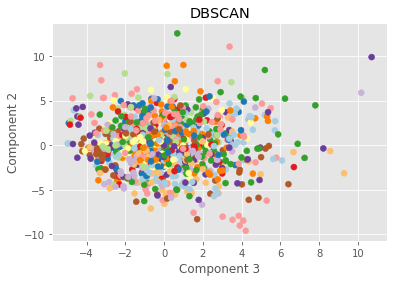

In [26]:
x_axis = df_pca_kmeans_country['Component 3']
y_axis = df_pca_kmeans_country['Component 2']
plt.xlabel("Component 3")
plt.ylabel("Component 2")
plt.scatter(x_axis, y_axis,c=labels, cmap='Paired')
plt.title("DBSCAN")

## Clustering using DBSCAN eps = 2, min_samples = 3

Text(0.5, 1.0, 'DBSCAN')

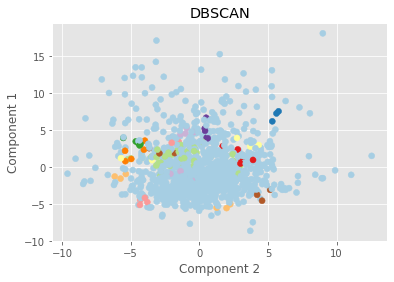

In [27]:
from sklearn.cluster import DBSCAN
db_default = DBSCAN(eps = 2, min_samples = 3)
db_default.fit(sources_pca)
labels = db_default.labels_
x_axis = df_pca_kmeans_country['Component 2']
y_axis = df_pca_kmeans_country['Component 1']

 
plt.scatter(x_axis, y_axis,c=labels, cmap='Paired')
plt.xlabel("Component 2")
plt.ylabel("Component 1")
plt.title("DBSCAN")

In [28]:
df_pca_kmeans_country['Cluster_DBSCAN'] = labels
df_pca_kmeans_country.head()

,0,1,2,3,4,5,6,7,8,9,...,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Segment K Means,Cluster,country,Cluster_DBSCAN
0,7.161286,7.835325,2.911583,0.984049,-1.499546,-2.094097,0.576000,-1.205671,1.849122,-0.425598,...,-1.068725,8.437277,5.197231,8.031621,5.961692,1.250007,0,first,Brazil,-1
1,0.225763,-0.094169,-0.603646,0.497745,0.874036,0.290280,-0.077659,-0.887385,0.432062,-0.093963,...,0.190528,0.862663,0.072850,2.825872,-0.648767,-0.942613,0,first,Cape Verde,0
2,-0.692525,-0.517801,-0.788035,1.214351,-0.907214,0.880213,0.406899,-0.694895,-0.901869,-1.701574,...,4.149918,-1.397989,-2.099786,0.745891,-2.962638,0.925519,1,second,Mali,-1
3,-0.735562,-0.684055,2.058215,0.716328,-0.011393,0.805396,1.497982,0.114752,0.692847,0.052377,...,-0.947960,4.093904,2.281610,-0.324633,-1.668093,1.756031,0,first,Ethiopia,-1
4,0.570272,0.273157,-0.279214,0.083456,1.049331,-0.869295,-0.265858,-0.401676,-0.872639,1.147483,...,0.366876,-1.564429,0.080292,2.907152,0.253181,-0.759579,0,first,Morocco,0


### Percentage of songs that belong to each cluster

In [29]:
def get_clusters_dbscan(df_pca_kmeans_country):
    clusters = {}
    countries = {}
    for index, row in df_pca_kmeans_country.iterrows():
        if row['Cluster_DBSCAN'] not in clusters:
            clusters[row['Cluster_DBSCAN']] = {}
        if row['country'] in clusters[row['Cluster_DBSCAN']]:
            clusters[row['Cluster_DBSCAN']][row['country']] += 1
        else:
            clusters[row['Cluster_DBSCAN']][row['country']] = 1
        #getting total country counts
        if row['country'] in countries:
            countries[row['country']] += 1
        else:
            countries[row['country']] = 1

    for key in clusters:
        print("-----------")
        print(key)
        print("-----------")
        for k in clusters[key]:
            print(k, " ", round(((clusters[key][k])/countries[k]),2))
get_clusters_dbscan(df_pca_kmeans_country)

-----------
-1
-----------
Brazil   0.36
Mali   0.39
Ethiopia   0.27
Uzbekistan   0.31
India   0.33
Lithuania   0.62
Romania   0.42
United Kingdom   0.64
Algeria   0.34
Turkey   0.22
Myanmar   0.8
Thailand   0.63
China   0.68
Taiwan   0.2
Indonesia   0.72
Pakistan   0.3
Egypt   0.32
Kyrgyzstan   0.31
Kenya   0.25
Iran   0.57
Belize   0.55
Italy   0.35
Cape Verde   0.32
Australia   0.71
Japan   0.53
Georgia   0.52
Cambodia   0.64
Jamaica   0.14
Senegal   0.42
Albania   0.48
Greece   0.15
Morocco   0.24
Tanzania   0.25
-----------
0
-----------
Cape Verde   0.65
Morocco   0.67
Mali   0.58
Senegal   0.46
United Kingdom   0.09
Uzbekistan   0.69
Italy   0.51
Pakistan   0.64
Romania   0.58
Algeria   0.57
Turkey   0.77
China   0.33
Indonesia   0.28
Jamaica   0.82
Iran   0.43
India   0.58
Kyrgyzstan   0.69
Kenya   0.75
Greece   0.85
Brazil   0.64
Australia   0.29
Japan   0.42
Belize   0.36
Tanzania   0.7
Georgia   0.07
Cambodia   0.14
Ethiopia   0.73
Egypt   0.52
Albania   0.43
Thailand   0.26

## DBSCAN Clustering with eps = 3, min_samples = 5

Text(0.5, 1.0, 'DBSCAN')

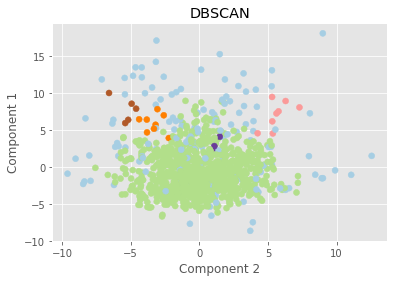

In [30]:
db_default = DBSCAN(eps = 3, min_samples = 5)
db_default.fit(sources_pca)
labels = db_default.labels_
x_axis = df_pca_kmeans_country['Component 2']
y_axis = df_pca_kmeans_country['Component 1']

 
plt.scatter(x_axis, y_axis,c=labels, cmap='Paired')
plt.xlabel("Component 2")
plt.ylabel("Component 1")
plt.title("DBSCAN")

In [31]:
df_pca_kmeans_country['Cluster_DBSCAN'] = labels
df_pca_kmeans_country.head()

,0,1,2,3,4,5,6,7,8,9,...,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Segment K Means,Cluster,country,Cluster_DBSCAN
0,7.161286,7.835325,2.911583,0.984049,-1.499546,-2.094097,0.576000,-1.205671,1.849122,-0.425598,...,-1.068725,8.437277,5.197231,8.031621,5.961692,1.250007,0,first,Brazil,-1
1,0.225763,-0.094169,-0.603646,0.497745,0.874036,0.290280,-0.077659,-0.887385,0.432062,-0.093963,...,0.190528,0.862663,0.072850,2.825872,-0.648767,-0.942613,0,first,Cape Verde,0
2,-0.692525,-0.517801,-0.788035,1.214351,-0.907214,0.880213,0.406899,-0.694895,-0.901869,-1.701574,...,4.149918,-1.397989,-2.099786,0.745891,-2.962638,0.925519,1,second,Mali,0
3,-0.735562,-0.684055,2.058215,0.716328,-0.011393,0.805396,1.497982,0.114752,0.692847,0.052377,...,-0.947960,4.093904,2.281610,-0.324633,-1.668093,1.756031,0,first,Ethiopia,0
4,0.570272,0.273157,-0.279214,0.083456,1.049331,-0.869295,-0.265858,-0.401676,-0.872639,1.147483,...,0.366876,-1.564429,0.080292,2.907152,0.253181,-0.759579,0,first,Morocco,0


### Percentage of songs that belong to each cluster

In [32]:
get_clusters_dbscan(df_pca_kmeans_country)

-----------
-1
-----------
Brazil   0.06
Uzbekistan   0.06
India   0.09
Lithuania   0.25
Romania   0.16
United Kingdom   0.36
Turkey   0.08
Myanmar   0.24
Thailand   0.26
Indonesia   0.24
Kenya   0.22
Iran   0.22
Belize   0.27
Cape Verde   0.06
Australia   0.43
Japan   0.32
Georgia   0.1
China   0.33
Senegal   0.12
Greece   0.09
Pakistan   0.11
Mali   0.09
Kyrgyzstan   0.15
Italy   0.08
Morocco   0.06
Egypt   0.06
Albania   0.05
Cambodia   0.07
Algeria   0.03
-----------
0
-----------
Cape Verde   0.94
Mali   0.91
Ethiopia   0.97
Morocco   0.94
Senegal   0.88
United Kingdom   0.64
Uzbekistan   0.94
Italy   0.92
Pakistan   0.89
Romania   0.84
Algeria   0.97
Turkey   0.91
Thailand   0.67
China   0.65
Taiwan   1.0
Indonesia   0.76
Jamaica   1.0
Iran   0.78
Egypt   0.94
India   0.91
Kyrgyzstan   0.85
Kenya   0.75
Greece   0.89
Brazil   0.94
Australia   0.57
Japan   0.68
Belize   0.73
Tanzania   1.0
Georgia   0.9
Cambodia   0.71
Albania   0.9
Lithuania   0.62
Myanmar   0.36
-----------
3
--

---

# T-SNE

In [40]:
from sklearn.manifold import TSNE

           X          Y
0 -28.559673 -13.610503
1   9.404758  -6.142437
2   6.132463 -26.064596
3  14.609772   0.281422
4  -2.880363 -16.206900


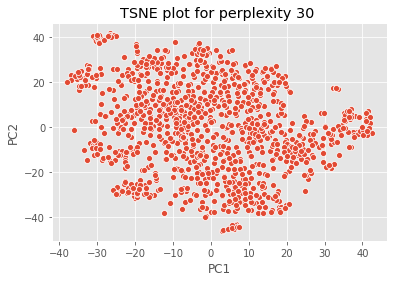

In [111]:
tsne = TSNE(n_components=2, perplexity=30, n_iter = 5000, random_state = 50)

# fitting t-sne to the data
tsne_fit = tsne.fit_transform(X)

# Create dataframes containing Principal components after t-sne
tsne_df = pd.DataFrame({'X':tsne_fit[:,0],
                        'Y':tsne_fit[:,1]})

print(tsne_df.head())

# Plot the data after t-sne
sns.scatterplot(x='X', y='Y', data=tsne_df)
plt.title("TSNE plot for perplexity 30 ")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

           X          Y
0  14.087551 -10.815870
1   4.985652 -12.315817
2 -16.826597   2.357845
3   8.439078 -13.844817
4  -7.664059   7.050635


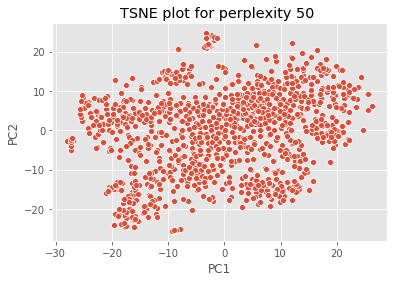

In [110]:
tsne = TSNE(n_components=2, perplexity=50, n_iter = 5000, random_state = 50)

# fitting t-sne to the data
tsne_fit = tsne.fit_transform(X)

# Create dataframes containing Principal components after t-sne
tsne_df = pd.DataFrame({'X':tsne_fit[:,0],
                        'Y':tsne_fit[:,1]})

print(tsne_df.head())

# Plot the data after t-sne
sns.scatterplot(x='X', y='Y', data=tsne_df)
plt.title("TSNE plot for perplexity 50 ")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

           X          Y
0 -12.014069   2.783465
1 -10.459086  -1.462756
2   1.602678  11.275537
3 -11.388940  -4.325868
4   4.416456   4.913273


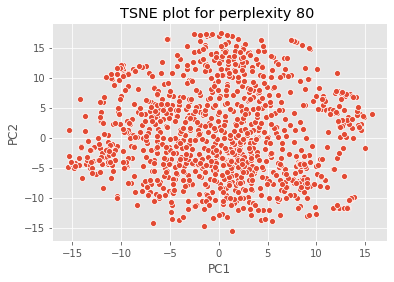

In [109]:
tsne = TSNE(n_components = 2, perplexity = 80, n_iter = 5000, random_state = 50)

# fitting t-sne to the data
tsne_fit = tsne.fit_transform(X)

# Create dataframes containing Principal components after t-sne
tsne_df = pd.DataFrame({'X':tsne_fit[:,0],
                        'Y':tsne_fit[:,1]})

print(tsne_df.head())

# Plot the data after t-sne
sns.scatterplot(x='X', y='Y', data=tsne_df)
plt.title("TSNE plot for perplexity 80 ")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

           X          Y
0  12.333566  96.729424
1  54.456570  76.870331
2  58.596405 -36.569618
3  48.960247  86.216728
4  17.666765 -38.963459


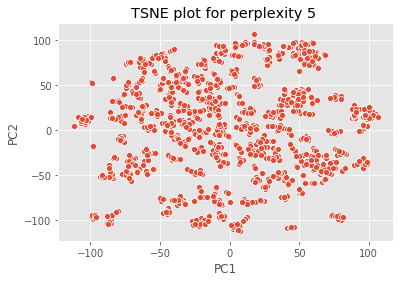

In [112]:
tsne = TSNE(n_components=2, perplexity=5, n_iter = 5000, random_state = 50)

# fitting t-sne to the data
tsne_fit = tsne.fit_transform(X)

# Create dataframes containing Principal components after t-sne
tsne_df = pd.DataFrame({'X':tsne_fit[:,0],
                        'Y':tsne_fit[:,1]})

print(tsne_df.head())

# Plot the data after t-sne
sns.scatterplot(x='X', y='Y', data=tsne_df)
plt.title("TSNE plot for perplexity 5 ")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

          X         Y
0 -0.920818 -7.346902
1  1.998571  5.048462
2  8.964880  2.600107
3  1.471008  7.554724
4  3.898896  3.051528


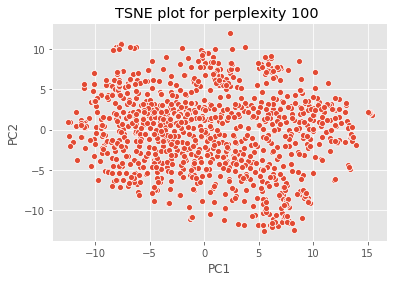

In [113]:
tsne = TSNE(n_components=2, perplexity=100, n_iter = 5000, random_state = 50)

# fitting t-sne to the data
tsne_fit = tsne.fit_transform(X)

# Create dataframes containing Principal components after t-sne
tsne_df = pd.DataFrame({'X':tsne_fit[:,0],
                        'Y':tsne_fit[:,1]})

print(tsne_df.head())

# Plot the data after t-sne
sns.scatterplot(x='X', y='Y', data=tsne_df)
plt.title("TSNE plot for perplexity 100 ")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# Model Building

We are going to build multiple classification models to predict the country of origin of the music. 

In [45]:
from sklearn.feature_selection import RFE

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.8, random_state=1234)

rfc = RandomForestClassifier(n_estimators=35)

rfe = RFE(estimator = rfc, n_features_to_select=10)
rfe.fit(Xtrain, ytrain)
X_reduced = rfe.transform(X)

Xtrain, Xtest, ytrain, ytest = train_test_split(X_reduced, y, test_size=0.8, random_state=1234)

X_reduced.shape

(1059, 10)

## K - Nearest Neighbors Classifier

In [55]:
# Load the data containing mapping of audio features with the 'country' label
data = df_pca_kmeans_country

# Separate features and label
X = np.asarray(data.iloc[:,0:68])
y = data.country

# Encode the categorical target
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y = np.asarray(y)

# Split train and test data
Xtrain, Xtest, ytrain, ytest = train_test_split(X_reduced, y, test_size=0.2, random_state=1234)

# Scale the features
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
Xtrain= sc.fit_transform(Xtrain)
Xtest= sc.fit_transform(Xtest)

# Fit KNN to the data
from sklearn.neighbors import KNeighborsClassifier
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2) 
classifier.fit(Xtrain, ytrain)

# Predict and get original labels
y_pred= classifier.predict(Xtest)
y_pred = list(le.inverse_transform(y_pred))
ytest = list(le.inverse_transform(ytest))

df1 = pd.DataFrame(y_pred, columns = ['y_pred'])
df2 = pd.DataFrame(ytest, columns = ['ytest'])
df = pd.concat([df1, df2], axis = 1)

# Calculate Accuracy
count = 0
for index, row in df.iterrows():
    if row['y_pred'] == row['ytest']:
        count += 1
        
accuracy_knn = count/len(df)        
print("Accuracy : {}".format(count/len(df)))

Accuracy : 0.2830188679245283


## Random Forest Classifier

In [64]:
# Load the data containing mapping of audio features with the 'country' label
data = df_pca_kmeans_country

# Separate features and label
X = np.asarray(data.iloc[:,0:68])
y = data.country

# Encode the categorical target
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y = np.asarray(y)

# Split train and test data
Xtrain, Xtest, ytrain, ytest = train_test_split(X_reduced, y, test_size=0.2, random_state=1234)

# Scale the features
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
Xtrain= sc.fit_transform(Xtrain)
Xtest= sc.fit_transform(Xtest) 

# Fit Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
classifier= RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
classifier.fit(Xtrain, ytrain)

# Predict and get original labels
y_pred= classifier.predict(Xtest)

y_pred = list(le.inverse_transform(y_pred))
ytest = list(le.inverse_transform(ytest))

df1 = pd.DataFrame(y_pred, columns = ['y_pred'])
df2 = pd.DataFrame(ytest, columns = ['ytest'])
df = pd.concat([df1, df2], axis = 1)

# Calculate Accuracy
count = 0
for index, row in df.iterrows():
    if row['y_pred'] == row['ytest']:
        count += 1
        
accuracy_rf = count/len(df)       
print("Accuracy : {}".format(count/len(df)))

Accuracy : 0.2641509433962264


# SVM Classifier

In [63]:
# Load the data containing mapping of audio features with the 'country' label
data = df_pca_kmeans_country

# Separate features and label
X = np.asarray(data.iloc[:,0:68])
y = data.country

# Encode the categorical target
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y = np.asarray(y)

# Split train and test data
Xtrain, Xtest, ytrain, ytest = train_test_split(X_reduced, y, test_size=0.2, random_state=1234)

# Scale the features
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
Xtrain= sc.fit_transform(Xtrain)
Xtest= sc.fit_transform(Xtest)

# Fit SVC
from sklearn.svm import SVC
classifier= SVC(kernel='linear', random_state=0)
classifier.fit(Xtrain, ytrain)

# Predict and get original labels
y_pred= classifier.predict(Xtest)
y_pred = list(le.inverse_transform(y_pred))
ytest = list(le.inverse_transform(ytest))

df1 = pd.DataFrame(y_pred, columns = ['y_pred'])
df2 = pd.DataFrame(ytest, columns = ['ytest'])
df = pd.concat([df1, df2], axis = 1)

# Calculate Accuracy
count = 0
for index, row in df.iterrows():
    if row['y_pred'] == row['ytest']:
        count += 1

accuracy_svc = count/len(df)
print("Accuracy : {}".format(count/len(df)))

Accuracy : 0.2971698113207547


## Logistic Regression Classifier

In [62]:
# Load the data containing mapping of audio features with the 'country' label
data = df_pca_kmeans_country

# Separate features and label
X = np.asarray(data.iloc[:,0:68])
y = data.country

# Encode the categorical target
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y = np.asarray(y)

# Split train and test data
Xtrain, Xtest, ytrain, ytest = train_test_split(X_reduced, y, test_size=0.2, random_state=1234)

# Scale the features
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
Xtrain= sc.fit_transform(Xtrain)
Xtest= sc.fit_transform(Xtest)

# Fit Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier= LogisticRegression(random_state=0)
classifier.fit(Xtrain, ytrain)

# Predict and get original labels
y_pred= classifier.predict(Xtest)
y_pred = list(le.inverse_transform(y_pred))
ytest = list(le.inverse_transform(ytest))

df1 = pd.DataFrame(y_pred, columns = ['y_pred'])
df2 = pd.DataFrame(ytest, columns = ['ytest'])
df = pd.concat([df1, df2], axis = 1)

# Calculate Accuracy
count = 0
for index, row in df.iterrows():
    if row['y_pred'] == row['ytest']:
        count += 1

accuracy_lr = count/len(df)
print("Accuracy : {}".format(count/len(df)))

Accuracy : 0.25471698113207547


In [73]:
# Accuracy of various models on raw data
pd.DataFrame([[accuracy_knn, accuracy_rf, accuracy_lr, accuracy_svc]],\
             columns = ['accuracy_knn', 'accuracy_rf', 'accuracy_lr', 'accuracy_svc'])

,accuracy_knn,accuracy_rf,accuracy_lr,accuracy_svc
0,0.29717,0.264151,0.254717,0.29717


# Geographical Accuracy Metric

We can notice that the accuracy of all the models is really low. This does not improve even after applying cross validation, dimensionality reduction and clustering techniques. 

The reason for the low accuracy, we believe is the hard assignment of country labels to the music data. It is useful to remember here that the geography of the world has continuously changed in history with merging and splitting of borders. It probably does not make sense to attribute the origin of music to the modern countries. Hence, we decided to constitute distinct regions comprising of countries. With this in mind, a custom 'geographical accuracy' metric was designed to examine the predictions not in a binary manner (True / False assignment), but rather as an evaluation of algorithm's decisions using geographical and cultural similarities and differences between countries.

To achieve that, 33 countries were split into 9 groups of size 2-6. The division was conducted based on a) the locations of countries, b) the cultural roots and history of the region which may have had an impact on the development of local music. Within each group, every pair of countries was assigned a score in a 0-1 range to further model their mutual cultural similarity. With this mechanism, a false assignment was not immediately discunted in the final accuracy score, but was instead rated: every prediction falling into the same 'bin' with the true label would be assigned a score, always higher than 0 and less than 1. The cumulative sum of scores divided by the number of examples would produce a total final outcome between 0 and 1. This score assignment for each region is inspired by the research done by the authors of the original paper about the artistic attributes shared among these countries. 

The countries sharing no similarities with others were treated as a seperate bin. In their cases, false predictions would always produce the score of 0.

In [74]:
from sklearn.model_selection import cross_val_score

import numpy as np

region1 = ('Cape Verde', 'Mali', 'Morocco', 'Senegal', 'Algeria')
region2 = ('Ethiopia', 'Egypt', 'Kenya', 'Tanzania')
region3 = ('England', 'Italy', 'Lithuania')
region4 = ('Romania', 'Turkey', 'Greece', 'Georgia', 'Albania')
region5 = ('Myanmar', 'Thailand', 'China', 'Taiwan', 'Indonesia', 'Cambodia')
region6 = ('Uzbekistan', 'Kyrgyzstan')
region7 = ('Pakistan', 'Iran')
region8 = ('Jamaica', 'Belize')
remaining_locations = ('Brazil', 'India', 'Australia', 'Japan')

region1_scores = np.array([[1, 0.3, 0.2, 0.3, 0.2],
                           [0.3, 1, 0.5, 0.8, 0.7],
                           [0.2, 0.5, 1, 0.4, 0.8],
                           [0.3, 0.8, 0.4, 1, 0.5],
                           [0.2, 0.7, 0.8, 0.5, 1]])

region2_scores = np.array([[1, 0.2, 0.7, 0.6],
                           [0.2, 1, 0.2, 0.2],
                           [0.7, 0.2, 1, 0.7],
                           [0.6, 0.2, 0.7, 1]])

region3_scores = np.array([[1, 0.5, 0.7],
                           [0.5, 1, 0.4],
                           [0.7, 0.4, 1]])

region4_scores = np.array([[1, 0.7, 0.7, 0.4, 0.7],
                           [0.7, 1, 0.8, 0.6, 0.6],
                           [0.7, 0.8, 1, 0.5, 0.8],
                           [0.4, 0.6, 0.5, 1, 0.5],
                           [0.7, 0.6, 0.8, 0.5, 1]])

region5_scores = np.array([[1, 0.8, 0.7, 0.6, 0.6, 0.8],
                           [0.8, 1, 0.7, 0.6, 0.7, 0.9],
                           [0.7, 0.7, 1, 0.9, 0.6, 0.6],
                           [0.6, 0.6, 0.9, 1, 0.5, 0.6],
                           [0.6, 0.7, 0.6, 0.5, 1, 0.7],
                           [0.8, 0.9, 0.6, 0.6, 0.7, 1]])

region6_scores = np.array([[1, 0.9],
                           [0.9, 1]])

region7_scores = np.array([[1, 0.8],
                           [0.8, 1]])

region8_scores = np.array([[1, 0.8],
                           [0.8, 1]])

remaining_locations_scores = np.identity(4)

regions = { region1 : region1_scores, region2 : region2_scores, region3 : region3_scores,
            region4 : region4_scores, region5 : region5_scores, region6 : region6_scores,
            region7 : region7_scores, region8 : region8_scores, remaining_locations : remaining_locations_scores }

def geographical_accuracy(estimator, X, y):
    estimator.fit(X, y)
    estimated_labels = estimator.predict(X)
    result_sum = 0
    
    for estimation in zip(y, estimated_labels):
        for region in regions:    
            if set(estimation).issubset(set(region)):
                scores_tab_in_use = regions[region]
                row = region.index(estimation[0])
                column = region.index(estimation[1])
                result_sum += scores_tab_in_use[row][column]
    return result_sum / len(y)

---

Our original data is highly imbalanced. This might once again affect the performance of our models. To address this, data is split into training set and test set using StratifiedShuffleSplit method from scikit-learn module in order to ensure equal distribution of musical pieces' countries of origin in both sets. Training set is then standarized.

In [78]:
data = df_countries.drop(['lat', 'long'], axis = 1)

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)

for train_index, test_index in split.split(data, data['country']):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

In [79]:
(data['country'].value_counts() / len(data)).head()

India       0.065156
Mali        0.062323
Turkey      0.060434
Italy       0.048159
Pakistan    0.044381
Name: country, dtype: float64

In [80]:
(strat_train_set['country'].value_counts() / len(strat_train_set)).head()

India       0.064935
Mali        0.062574
Turkey      0.060213
Italy       0.048406
Pakistan    0.043684
Name: country, dtype: float64

In [81]:
music = strat_train_set.copy()

targets = music['country']
data = music.drop('country', axis = 1)

In [82]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

data_scaled = pd.DataFrame(data = data_scaled[:,:],
                           index = None)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017CEF781288>,
      dtype=object)

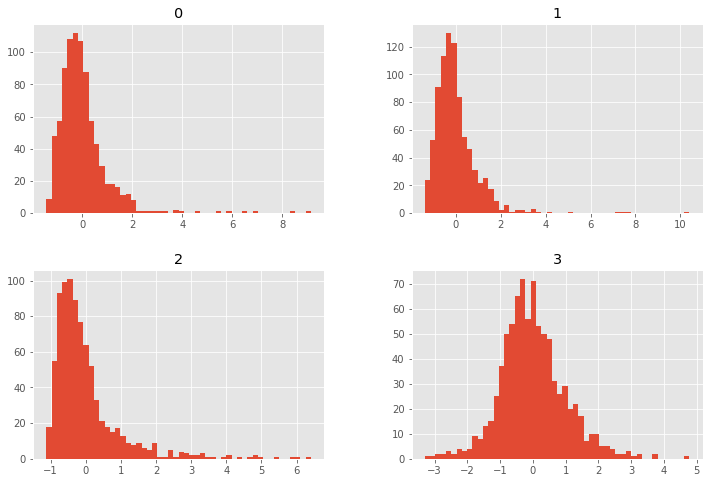

In [83]:
%matplotlib inline
import matplotlib.pyplot as plt

data_scaled.hist(bins = 50, column = [0, 1, 2, 3], figsize = (12, 8))

We have plotted a sample of the scaled data above. We can see that the data now is similarly distributed and has a correction applied to reduce the imbalance. Now, we can go ahead and build our models. 

Five classification algorithms were tested to choose the one producing the highest geographical accuracy score. The algorithms were: stochastic gradient descent classifier, linear support vector classifier, logistic regression classifier, extra-trees classifier and random forest classifier. Exhaustive grid search was then applied to the highest scoring method in order to find the optimal parameters.

In [85]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42)

cross_val_score(sgd_clf, 
                data_scaled, 
                targets, 
                cv = 3, 
                scoring = geographical_accuracy)

array([0.95335689, 0.95035461, 0.94680851])

In [86]:
from sklearn.svm import LinearSVC

svc_clf = LinearSVC(penalty = 'l2', C = 1, loss = 'squared_hinge', dual = False)

cross_val_score(svc_clf, 
                data_scaled, 
                targets, 
                cv = 3, 
                scoring = geographical_accuracy)

array([0.96819788, 0.96808511, 0.97163121])

In [87]:
from sklearn.linear_model import LogisticRegression

softmax_clf = LogisticRegression(multi_class = 'multinomial', solver = 'newton-cg')

cross_val_score(softmax_clf, 
                data_scaled, 
                targets, 
                cv = 3, 
                scoring = geographical_accuracy)

array([0.96819788, 0.96808511, 0.97163121])

In [88]:
from sklearn.ensemble import ExtraTreesClassifier

ext_clf = ExtraTreesClassifier()

cross_val_score(ext_clf, 
                data_scaled, 
                targets, 
                cv = 3, 
                scoring = geographical_accuracy)

array([0.96819788, 0.96808511, 0.97163121])

In [89]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier()

cross_val_score(forest_clf, 
                data_scaled, 
                targets, 
                cv = 3, 
                scoring = geographical_accuracy)

array([0.96819788, 0.96808511, 0.97163121])

Random Forest seems to be performing really well on our data set. Let us find the optimal parameters to tune our RF model using grid search.

In [90]:
from sklearn.model_selection import GridSearchCV

param_grid = { 'n_estimators' : [10, 100, 500], 'max_features' : [2, 10, 40, 60],
               'bootstrap' : [True, False] }

grid_search = GridSearchCV(forest_clf, param_grid, cv = 3, scoring = geographical_accuracy)
grid_search.fit(data_scaled, targets)

cv_res = grid_search.cv_results_

for accuracy, params in zip(cv_res["mean_test_score"], cv_res["params"]):
    print(accuracy, params)

0.9681226975415381 {'bootstrap': True, 'max_features': 2, 'n_estimators': 10}
0.9693047306384649 {'bootstrap': True, 'max_features': 2, 'n_estimators': 100}
0.9693047306384649 {'bootstrap': True, 'max_features': 2, 'n_estimators': 500}
0.9681226975415381 {'bootstrap': True, 'max_features': 10, 'n_estimators': 10}
0.9693047306384649 {'bootstrap': True, 'max_features': 10, 'n_estimators': 100}
0.9693047306384649 {'bootstrap': True, 'max_features': 10, 'n_estimators': 500}
0.9693047306384649 {'bootstrap': True, 'max_features': 40, 'n_estimators': 10}
0.9693047306384649 {'bootstrap': True, 'max_features': 40, 'n_estimators': 100}
0.9693047306384649 {'bootstrap': True, 'max_features': 40, 'n_estimators': 500}
0.9693047306384649 {'bootstrap': True, 'max_features': 60, 'n_estimators': 10}
0.9693047306384649 {'bootstrap': True, 'max_features': 60, 'n_estimators': 100}
0.9693047306384649 {'bootstrap': True, 'max_features': 60, 'n_estimators': 500}
0.9693047306384649 {'bootstrap': False, 'max_fe

In [91]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [92]:
final_model = grid_search.best_estimator_

music_test = strat_test_set.copy()
targets_test = music_test['country']
data_test = music_test.drop('country', axis = 1)

data_test_scaled = scaler.transform(data_test)

data_test_scaled = pd.DataFrame(data = data_test_scaled[:,:],
                                index = None)

test_set_predictions = final_model.predict(data_test_scaled)

geographical_accuracy(final_model, data_test_scaled, test_set_predictions)

0.9764150943396226

In [103]:
# Prepare data frames to merge
df_pred = pd.DataFrame(test_set_predictions, columns = ['country_predicted'])
music_test = music_test.reset_index()

In [105]:
# Combine predictions with original labels for comparison
df_results = pd.concat([music_test, df_pred], axis = 1)
df_results

,index,0,1,2,3,4,5,6,7,8,...,62,63,64,65,66,67,68,69,country,country_predicted
0,890,0.474627,0.653120,0.287641,-1.326033,-0.634030,-0.248879,0.391447,-0.420023,0.819696,...,-0.914526,-0.770100,-0.646449,-0.434169,0.021945,0.165920,-6.17,106.82,Indonesia,India
1,502,0.123849,-0.777647,-0.317594,0.017090,0.171721,-0.348809,0.902740,-0.242465,0.414709,...,-1.029392,-1.301402,-0.652238,-0.842653,-0.884500,-0.070451,41.26,69.21,Uzbekistan,Uzbekistan
2,1014,1.266983,0.547253,0.018496,-1.237640,1.261660,-1.256078,-0.055537,1.887612,-0.794719,...,-0.477216,-0.265719,0.209244,-0.280409,-0.405019,-0.461335,28.61,77.20,India,Italy
3,195,-0.188405,-0.441716,-0.763950,-0.716883,-0.386956,0.360364,0.364259,-0.907740,-0.906215,...,-0.534299,-0.454236,-0.540198,-0.461087,-0.216292,-0.108031,23.76,121.00,Taiwan,Taiwan
4,462,0.538471,0.489828,-0.287288,-0.761786,0.725382,-0.576596,-0.738241,0.261208,-0.872028,...,-0.043170,-0.559295,-0.108605,-0.682114,-0.471013,-0.306870,41.33,19.80,Albania,Albania
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,34,0.011607,0.443591,0.402823,-1.048004,-0.195513,-0.889745,-2.263715,0.495972,-1.193488,...,0.316405,2.502158,1.065644,1.172594,2.033766,4.137335,19.75,96.10,Myanmar,Thailand
208,488,-0.208667,-0.526884,-0.430941,-0.318691,-1.450329,0.221198,0.118926,0.450852,-0.443320,...,0.331750,0.481638,0.911994,1.524109,1.642450,0.926674,11.55,104.91,Cambodia,Cambodia
209,329,-0.448385,-0.032037,-0.451595,0.072301,1.417640,-0.156612,-0.227194,0.407408,0.166794,...,0.054693,0.065632,0.018913,-0.549162,-0.340905,-0.154249,39.91,32.83,Turkey,Turkey
210,998,-0.712635,-0.393637,-0.795383,-0.057606,-0.522996,1.537764,0.581945,-1.934877,-0.401523,...,0.878759,-0.752834,-0.555045,-0.017581,-0.335026,-0.647153,39.91,32.83,Turkey,Turkey


Finally, the optimized random forest classifier was used on the test set.

### The algoritm produced a geographical accuracy score of almost 92.5% for the test set and 93.5% for the training set.